# Image Recognition - CIFAR10

### Loading the Original Dataset

In [1]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### Browsing 36 First Training Screenshots

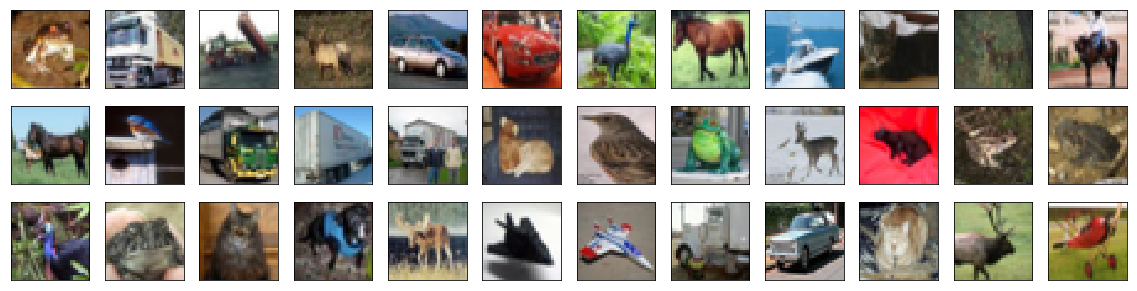

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### Applying Scale to the data by dividing each pixel of each image by 255.

In [3]:
# Escala [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### Dividing data into training, validation, and testing

In [4]:
from keras.utils import np_utils

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Applying One-Hot encoding to labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Printing training data shape
print('Training Data Shape:', x_train.shape)

# Printing total in each dataset
print(x_train.shape[0], 'training examples')
print(x_test.shape[0], 'test examples')
print(x_valid.shape[0], 'validation examples')

Training Data Shape: (45000, 32, 32, 3)
45000 training examples
10000 test examples
5000 validation examples


### Defining the Model Architecture

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 100, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 100)         25700     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 100)         0         
__________

### Compiling the Model

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

### Training the Model

In [7]:
from keras.callbacks import ModelCheckpoint   
from keras_tqdm import TQDMNotebookCallback

batch_size = 32
epochs = 10

# Salvando o melhor modelo (melhor conjunto de pesos)
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

# Fit
model.fit(x_train, 
          y_train, 
          validation_data = (x_valid, y_valid), 
          epochs = epochs, 
          batch_size = batch_size, 
          callbacks = [checkpointer, TQDMNotebookCallback()], 
          verbose = 2, 
          shuffle = True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 37s - loss: 1.5123 - acc: 0.4519 - val_loss: 1.3262 - val_acc: 0.5294

Epoch 00001: val_loss improved from inf to 1.32619, saving model to model.weights.best.hdf5
Epoch 2/10
 - 26s - loss: 1.1421 - acc: 0.5945 - val_loss: 1.0468 - val_acc: 0.6338

Epoch 00002: val_loss improved from 1.32619 to 1.04676, saving model to model.weights.best.hdf5
Epoch 3/10
 - 24s - loss: 0.9921 - acc: 0.6532 - val_loss: 1.2677 - val_acc: 0.5848

Epoch 00003: val_loss did not improve
Epoch 4/10
 - 24s - loss: 0.9116 - acc: 0.6817 - val_loss: 1.0916 - val_acc: 0.6042

Epoch 00004: val_loss did not improve
Epoch 5/10
 - 24s - loss: 0.8561 - acc: 0.7072 - val_loss: 0.9886 - val_acc: 0.6660

Epoch 00005: val_loss improved from 1.04676 to 0.98861, saving model to model.weights.best.hdf5
Epoch 6/10
 - 24s - loss: 0.8222 - acc: 0.7212 - val_loss: 0.8874 - val_acc: 0.7044

Epoch 00006: val_loss improved from 0.98861 to 0.88737, saving model to model.wei

### Loading the model with better accuracy in validation

In [9]:
model.load_weights('model.weights.best.hdf5')

### Calculating the Accuracy in Test Data

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test Accuracy:', score[1])


 Test Accuracy: 0.7203


### Some predictive tests

In [11]:
pred=model.predict(np.expand_dims(x_train[0], axis=0))
pred

array([[  1.00969039e-02,   1.86943065e-03,   2.00076550e-01,
          8.83896574e-02,   3.13811749e-01,   5.17608449e-02,
          3.14453304e-01,   1.89165901e-02,   3.03481211e-04,
          3.21468251e-04]], dtype=float32)

In [12]:
pred_class = np.argmax(pred)
pred_class

6

In [13]:
from PIL import Image
from keras.preprocessing.image import array_to_img, img_to_array, load_img

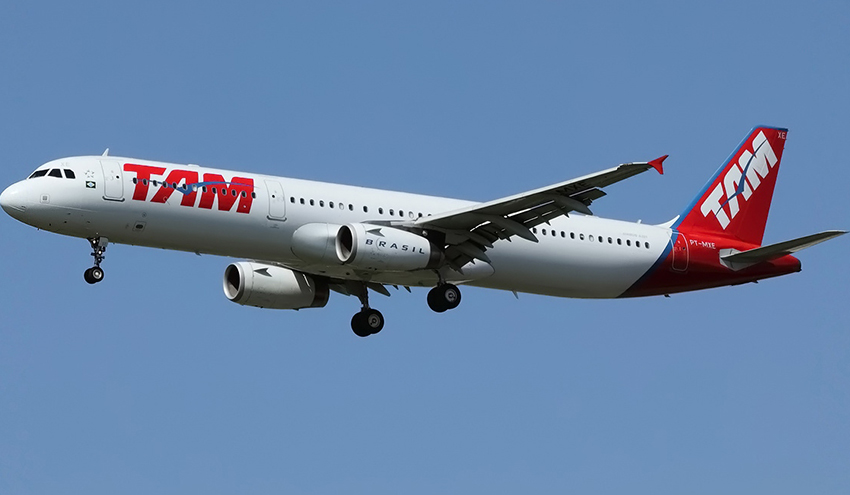

In [14]:
imagem=load_img('Aviao_Tam.jpg');imagem

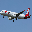

In [15]:
imagem=load_img('Aviao_Tam.jpg', target_size=(32,32,3));imagem

In [16]:
img_array=img_to_array(imagem).astype('float32')
img_array=img_array.reshape((1,32,32,3));img_array.shape

(1, 32, 32, 3)

In [21]:
output=model.predict(img_array)
print("Class   : ",np.argmax(output),"\nPrediction:",np.max(output))

Class   :  0 
Prediction: 1.0


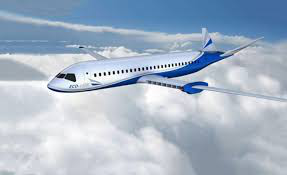

In [22]:
imagem=load_img('aviao2.jpg');imagem

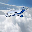

In [23]:
imagem=load_img('aviao2.jpg', target_size=(32,32,3));imagem

In [24]:
img_array=img_to_array(imagem).astype('float32')
img_array=img_array.reshape((1,32,32,3));img_array.shape

(1, 32, 32, 3)

In [25]:
output=model.predict(img_array)
print("Class   : ",np.argmax(output),"\nPrediction:",np.max(output))

Class   :  0 
Prediction: 1.0


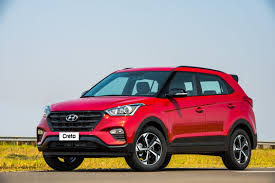

In [26]:
imagem=load_img('carro.jpg');imagem

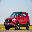

In [28]:
imagem=load_img('carro.jpg', target_size=(32,32,3));imagem

In [29]:
img_array=img_to_array(imagem).astype('float32')
img_array=img_array.reshape((1,32,32,3));img_array.shape

(1, 32, 32, 3)

In [31]:
output=model.predict(img_array)
print("Class   : ",np.argmax(output),"\nPrediction:",np.max(output))

Class   :  9 
Prediction: 1.0


In [32]:
output

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

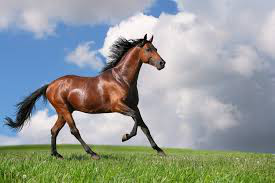

In [35]:
imagem=load_img('cavalo.jpg');imagem

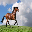

In [36]:
imagem=load_img('cavalo.jpg', target_size=(32,32,3));imagem

In [37]:
img_array=img_to_array(imagem).astype('float32')
img_array=img_array.reshape((1,32,32,3));img_array.shape

(1, 32, 32, 3)

In [38]:
output=model.predict(img_array)
print("Class   : ",np.argmax(output),"\nPrediction:",np.max(output))

Class   :  7 
Prediction: 1.0
